In [4]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display


In [81]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

ANGLE_INTENSITIES = {0: 1, 10: 0.95, 20: 0.85, 30: 0.73, 40: 0.6, 50: 0.45}

def plot_figure(num_leds, led_intensity):
    RADIANT_INTENSITY = num_leds * led_intensity

    def received_power_density(distance, angle):
        radiant_intensity = RADIANT_INTENSITY * ANGLE_INTENSITIES.get(angle, 0)
        return (radiant_intensity / (distance**2)) / 22.22
    
    # Calculate for a range of distances and angles
    distances = np.linspace(0.1, 10, 50)
    angles = list(ANGLE_INTENSITIES.keys())
    Z = np.array([[received_power_density(x, y) for x in distances] for y in angles])

    fig = go.Figure(data=go.Heatmap(
                       z=Z,
                       x=distances,
                       y=angles,
                       colorscale='Viridis',
                       colorbar_tickvals=[100, 1000, 10000, 100000, 1000000],
                       zmin=100, 
                       zmax=1000000,
                       hoverongaps=False))

    fig.update_layout(title='Received Power Density vs. Distance and Angle',
                      xaxis=dict(title='Distance (m)'),
                      yaxis=dict(title='Angle (degrees)'),
                      hovermode='closest')
    return fig

# Interactive widgets
led_count = widgets.Dropdown(options=list(range(1, 21)), value=1, description='Num LEDs:')
led_intensity = widgets.FloatText(value=2500, description='LED Intensity (mw/sr):', continuous_update=False)

# Function to update the displayed figure
def update_figure(change):
    output.clear_output(wait=True)
    with output:
        plot_figure(led_count.value, led_intensity.value).show()

led_count.observe(update_figure, names="value")
led_intensity.observe(update_figure, names="value")

output = widgets.Output()
with output:
    plot_figure(led_count.value, led_intensity.value).show()

widgets.VBox([widgets.HBox([led_count, led_intensity]), output])


In [ ]:
16 ta darbatch haye 4 taei

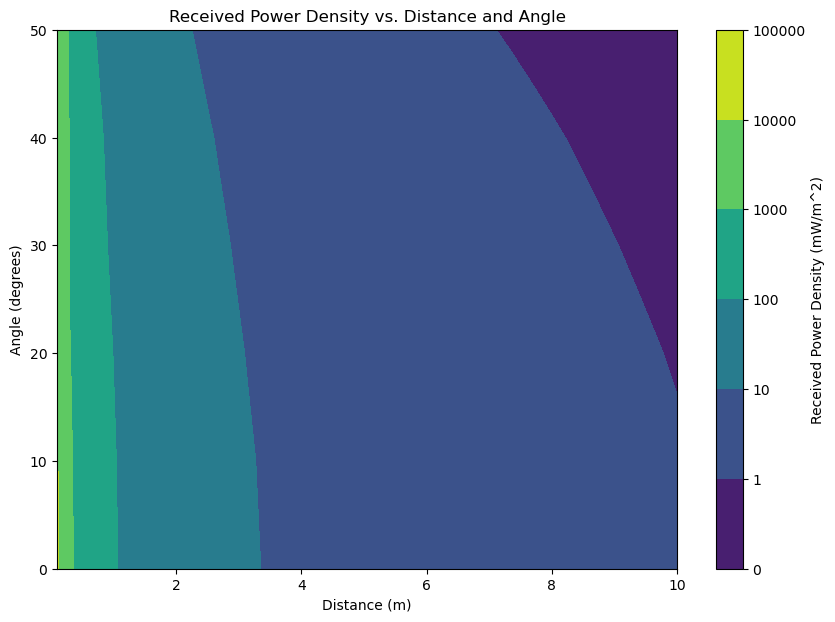

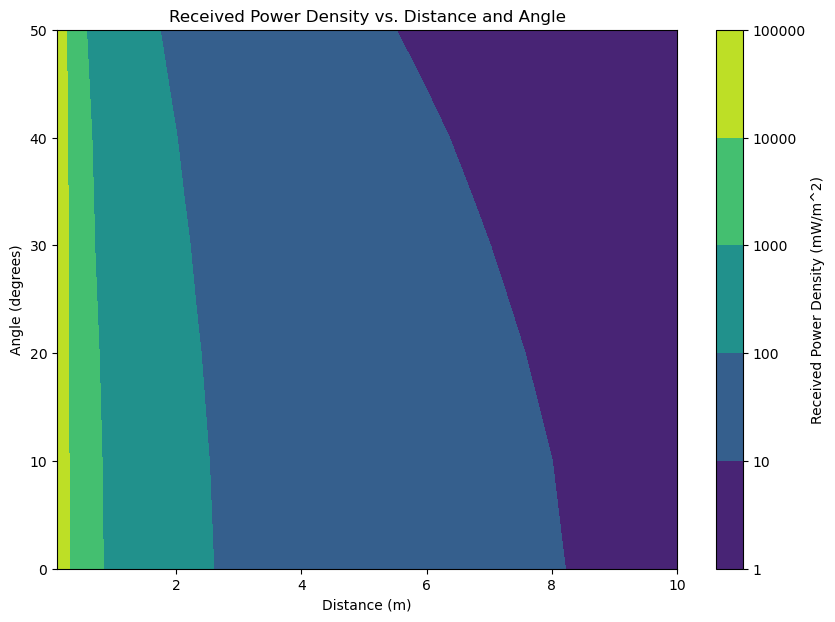

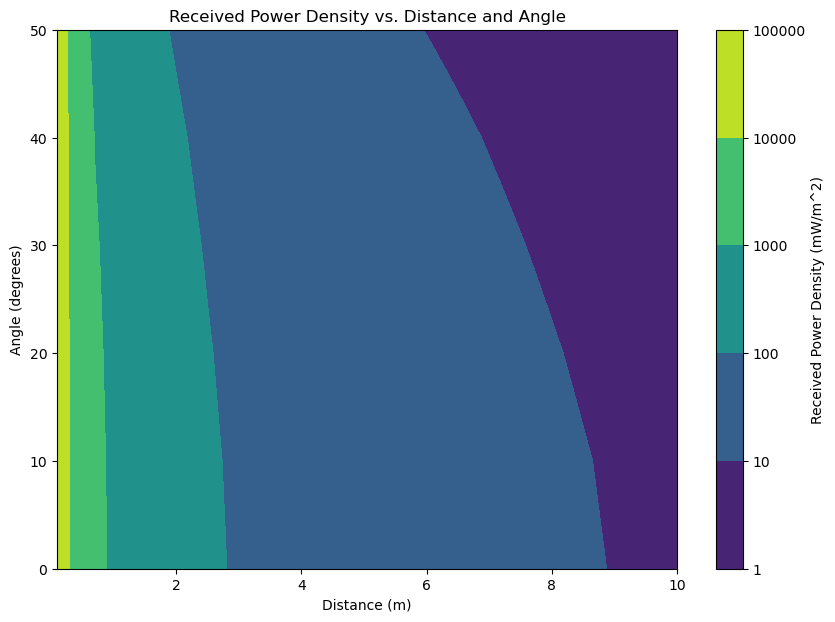

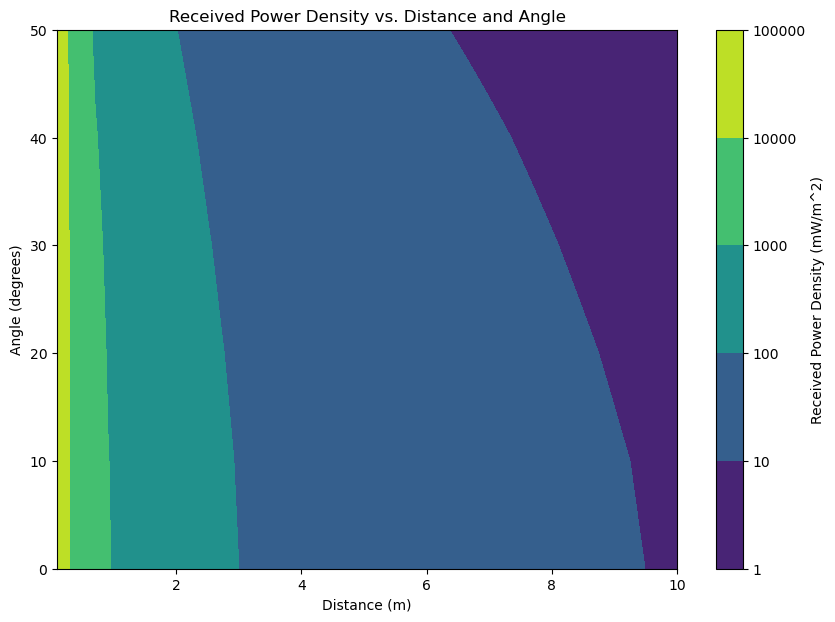

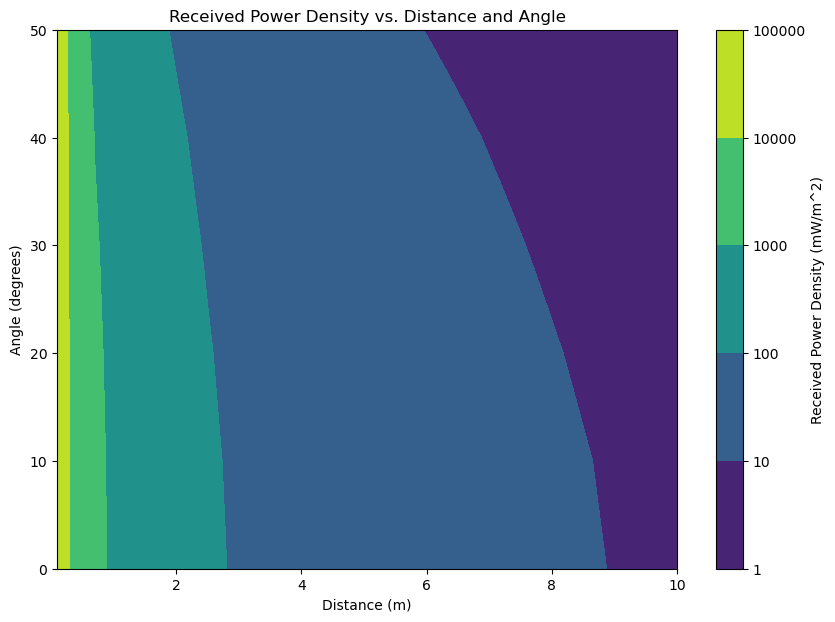

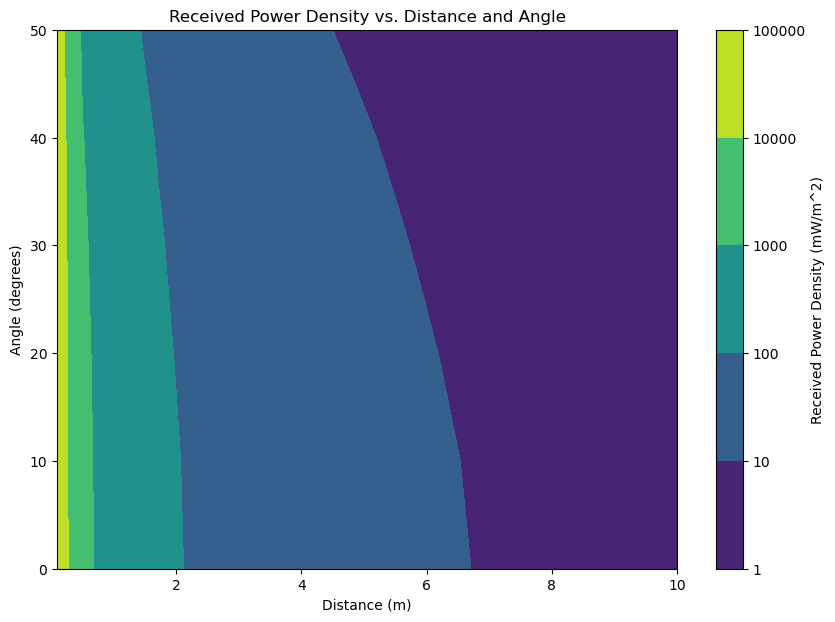

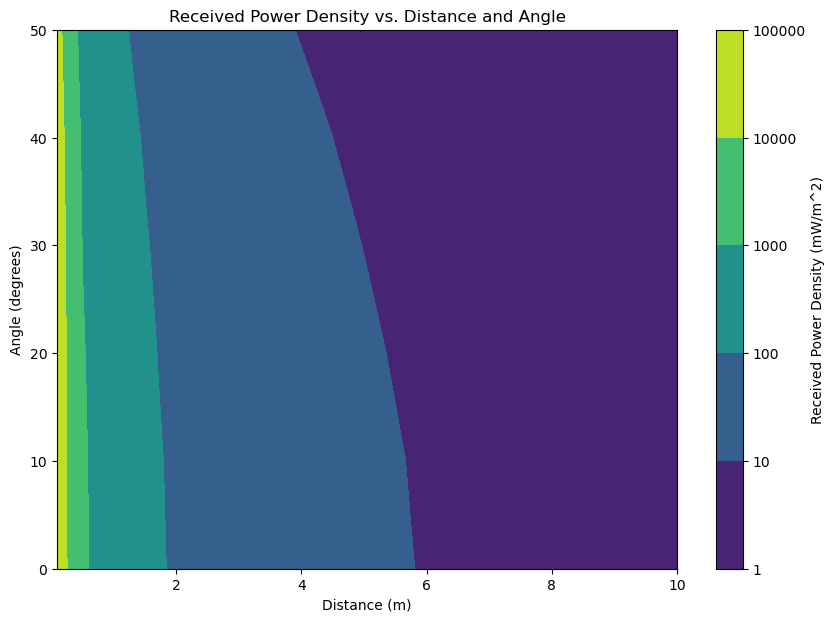

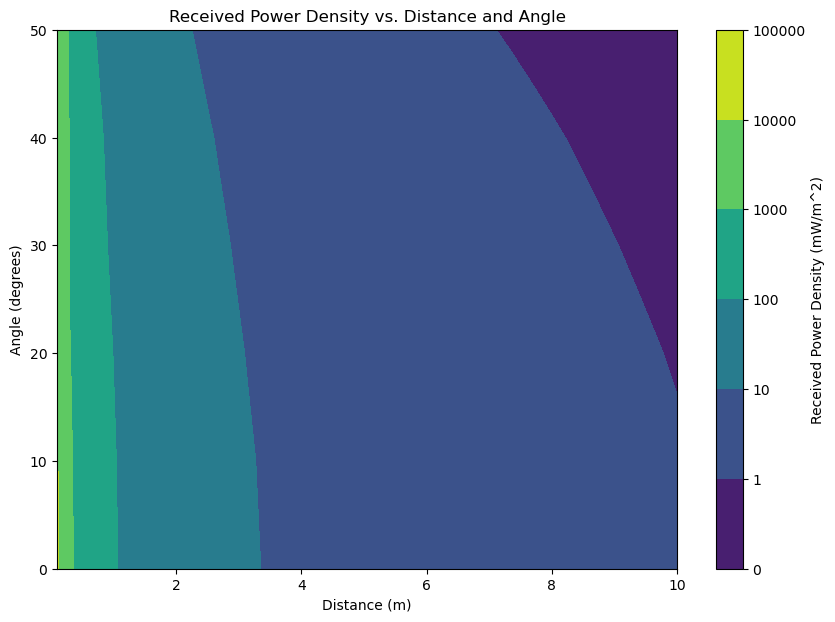

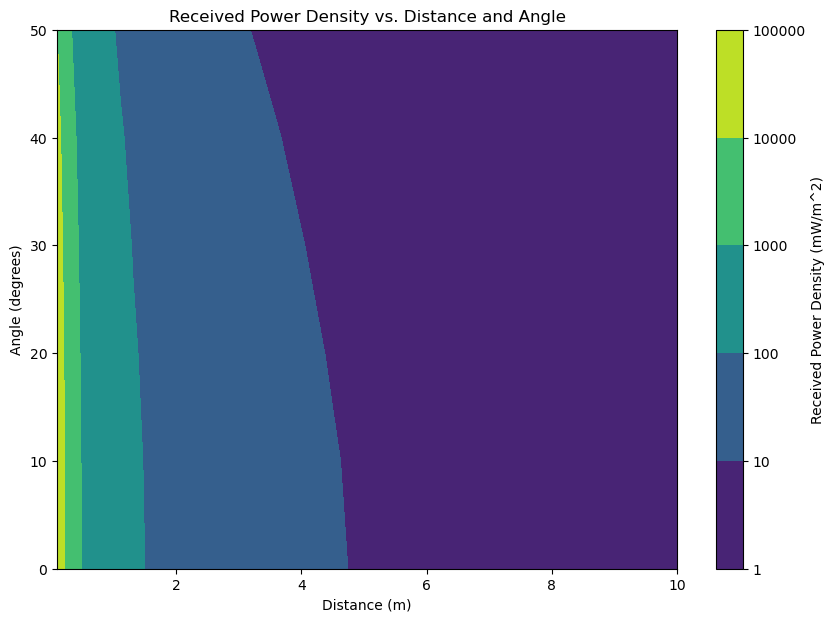

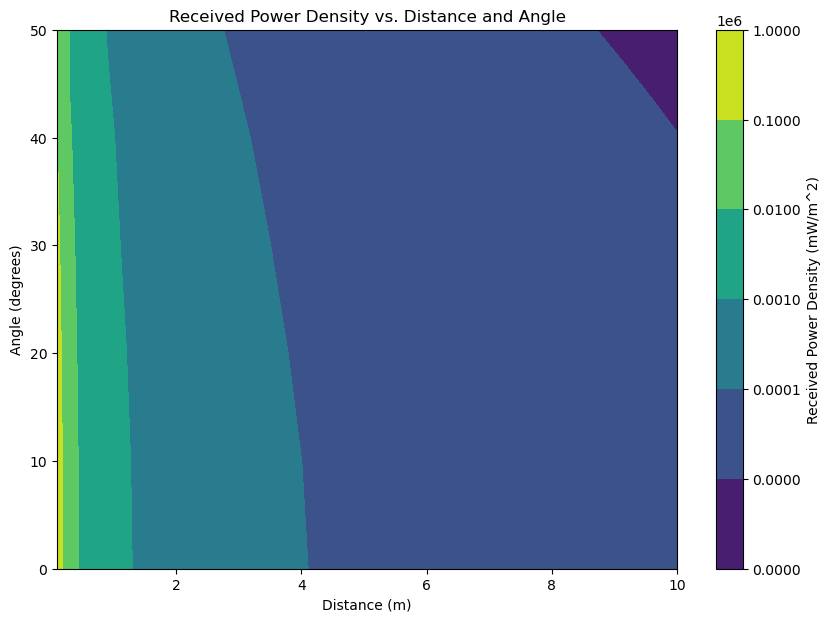

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from matplotlib.colors import LogNorm

ANGLE_INTENSITIES = {0: 1, 10: 0.95, 20: 0.85, 30: 0.73, 40: 0.6, 50: 0.45}

def plot_figure(num_leds, led_intensity):
    RADIANT_INTENSITY = num_leds * led_intensity
    
    def received_power_density(distance, angle):
        radiant_intensity = RADIANT_INTENSITY * ANGLE_INTENSITIES.get(angle, 0)
        return (radiant_intensity / (distance**2)) / 22.22
    
    distances = np.linspace(0.1, 10, 50)
    angles = list(ANGLE_INTENSITIES.keys())
    Z = np.array([[received_power_density(x, y) for x in distances] for y in angles])

    fig, ax = plt.subplots(figsize=(10, 7))
    cp = ax.contourf(distances, angles, Z, levels=100, norm=LogNorm(), cmap='viridis')
    fig.colorbar(cp, label='Received Power Density (mW/m^2)')
    ax.set_title('Received Power Density vs. Distance and Angle')
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Angle (degrees)')
    plt.show()

def on_change(change):
    clear_output(wait=True)
    display(controls)
    plot_figure(num_leds.value, led_intensity.value)

num_leds = widgets.IntSlider(min=1, max=20, value=1, description='Num LEDs:')
led_intensity = widgets.FloatText(value=2500, description='LED Intensity (mw/sr):', continuous_update=False)

num_leds.observe(on_change, names='value')
led_intensity.observe(on_change, names='value')

controls = widgets.HBox([num_leds, led_intensity])
display(controls)
plot_figure(num_leds.value, led_intensity.value)


In [84]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

# Define radiant intensities
ANGLE_INTENSITIES = {0: 1, 10: 0.95, 20: 0.85, 30: 0.73, 40: 0.6, 50: 0.45}

# Define the function to plot the heatmap
def plot_heatmap(num_leds, led_intensity):
    RADIANT_INTENSITY = num_leds * led_intensity
    
    def received_power_density(distance, angle):
        radiant_intensity = RADIANT_INTENSITY * ANGLE_INTENSITIES.get(angle, 0)
        return (radiant_intensity / (distance**2))/22.22

    distances = np.linspace(0.1, 10, 50)
    angles = list(ANGLE_INTENSITIES.keys())
    Z = np.array([[received_power_density(x, y) for x in distances] for y in angles])

    fig = go.Figure(data=go.Heatmap(
                       z=Z,
                       x=distances,
                       y=angles,
                       colorscale='Viridis',
                       colorbar_tickvals=[100, 1000, 10000, 100000, 1000000],
                       zmin=100, 
                       zmax=1000000,
                       hoverongaps=False))

    fig.update_layout(title='Received Power Density vs. Distance and Angle',
                      xaxis=dict(title='Distance (m)'),
                      yaxis=dict(title='Angle (degrees)'),
                      hovermode='closest')

    fig.show()

# Create the widgets
num_leds_widget = widgets.IntSlider(value=1, min=1, max=20, description="Number of LEDs")
led_intensity_widget = widgets.FloatText(value=2500, description="LED Intensity (mw/sr)")

# Update the plot when widgets are changed
def update(change):
    plot_heatmap(num_leds_widget.value, led_intensity_widget.value)

num_leds_widget.observe(update, names="value")
led_intensity_widget.observe(update, names="value")

# Initial plot
plot_heatmap(num_leds_widget.value, led_intensity_widget.value)

# Display widgets below the plot
display(widgets.VBox([num_leds_widget, led_intensity_widget]))
